<a href="https://colab.research.google.com/github/matijsv/PRA3024_mv/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#required installations
#I had to revert to an older version of matplotlib to get some of the methods working
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install -q matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Challenge 1**

In [2]:
#imports including data
import gwpy
from gwpy.timeseries import TimeSeries

!wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2022-02-14 22:09:05--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.2’

challenge1.gwf.2    100%[===================>]   3.84M  --.-KB/s    in 0.09s   

2022-02-14 22:09:05 (40.8 MB/s) - ‘challenge1.gwf.2’ saved [4025674/4025674]



In [3]:
#reading the data and returning sample rate + duration
gwpy_strain = TimeSeries.read('challenge1.gwf', channel='H1:CHALLENGE1')
print('Sample rate:', gwpy_strain.sample_rate )
print('Duration:', -(gwpy_strain.times[0] - gwpy_strain.times[-1])) 

Sample rate: 4096.0 Hz
Duration: 127.999755859375 s


Text(0.5, 0, 'Time[s]')

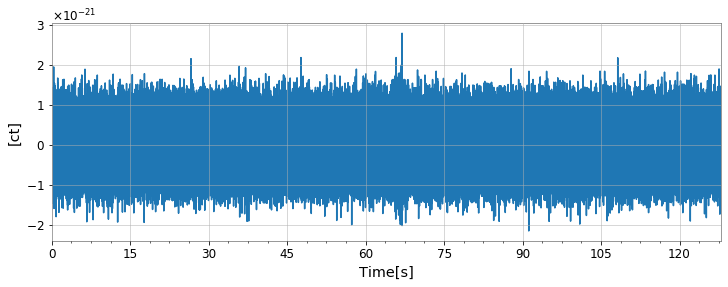

In [4]:
#plotting the data in the time domain
plot = gwpy_strain.plot()

#editing plot
ax = plot.gca()
ax.set_ylabel('[ct]')
ax.set_xlabel('Time[s]')

Time of event: +64s


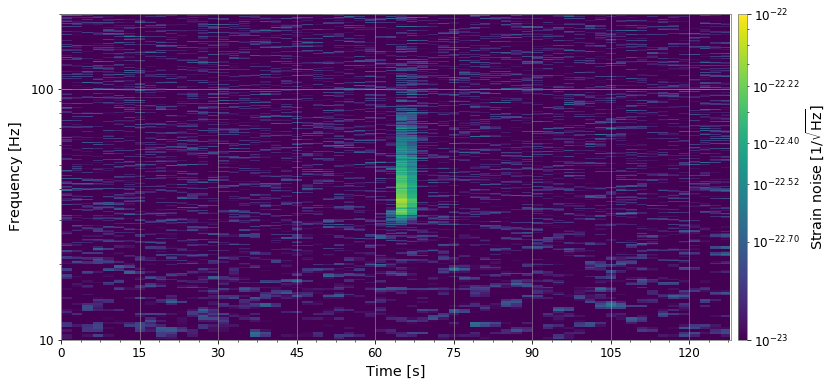

In [5]:
#plotting a spectrogram and approximate time of the merger
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

#editing plot
ax = plot.gca()
ax.set_xlabel('Time [s]')
ax.set_yscale('log')
ax.set_ylim(10, 200)
ax.colorbar(
    clim=(1e-23, 1e-22),
    norm="log",
    label="Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)

#approximate time seen on the plot
print('Time of event: +64s')

**Challenge 2**

In [6]:
#imports including data
import numpy
import pylab
import pycbc
from pycbc import frame
from pycbc.waveform import get_td_waveform
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter


!wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2022-02-14 22:09:13--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  --.-KB/s    in 0.1s    

2022-02-14 22:09:13 (34.8 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



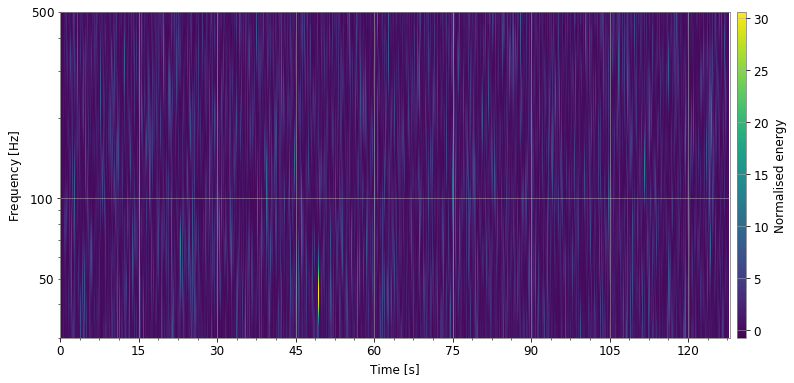

In [7]:
#reading data and plotting a Q transform
gwpy_strain = TimeSeries.read('challenge2.gwf', channel='H1:CHALLENGE2')

hq = gwpy_strain.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

#editing plot
ax = plot.gca()
ax.set_xlabel('Time [s]')
ax.set_ylim(30, 500)
ax.set_yscale("log")

Time of event: T+ 49.375s


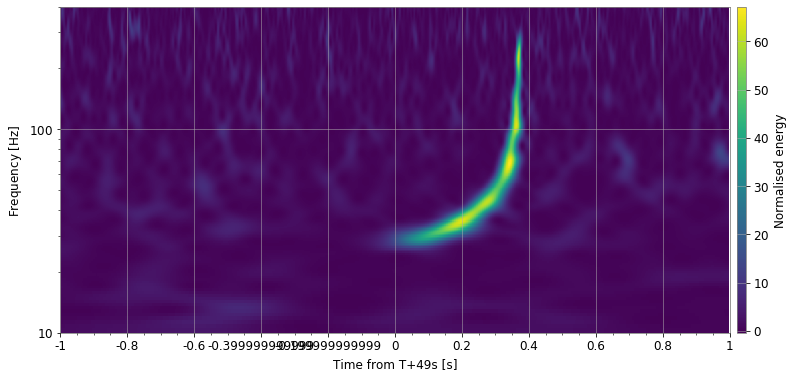

In [8]:
#zooming in on the area, the -64 weirdness in outseg params is because 
#the timeseries is centered at 0 gps time and is 64*2s in duration
hq = gwpy_strain.q_transform(frange=(10 , 400), qrange=(10, 90), outseg=(-64+48,-64+50))
plot = hq.plot()

#editing the plot
ax = plot.gca()
ax.set_xlabel('Time from T+49s [s]')
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

#approximate time of event by looking at plot
print('Time of event: T+ 49.375s')

Text(0, 0.5, 'Normalized amplitude')

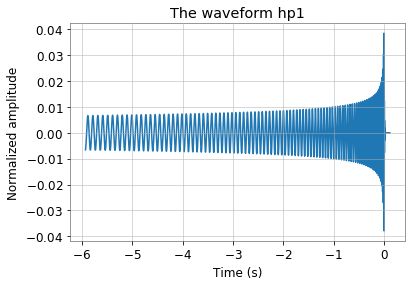

In [9]:
#creating and plotting the template waveform

#sample rate found by inversing dt in TimeSeries description, data length with .duration method
sample_rate = 4096 # samples per second
data_length = 128 # seconds

data = numpy.random.normal(size=[sample_rate * data_length])
times = numpy.arange(len(data)) / float(sample_rate)

apx = 'SEOBNRv4_opt'
hp1, _ = get_td_waveform(approximant=apx,
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/sample_rate,
                         f_lower= 10)
hp1 = hp1 / max(numpy.correlate(hp1, hp1, mode='full'))**0.5

#editing plot
pylab.figure()
pylab.title("The waveform hp1")
pylab.plot(hp1.sample_times, hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

/usr/local/lib/python3.7/dist-packages/gwpy/plot/axes.py:150: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  super().draw(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


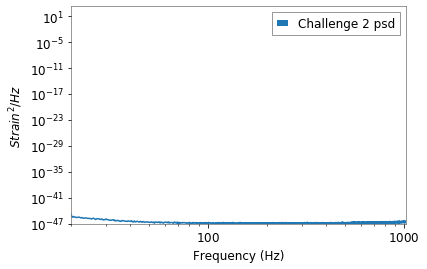

In [10]:
#calculating and plotting the PSD of the data
#reading the frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

#using 4 samples
psd = pycbc_strain.psd(4)
psd = interpolate(psd, pycbc_strain.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * pycbc_strain.sample_rate), low_frequency_cutoff=20.0)

pylab.plot(psd.sample_frequencies, psd, label=('Challenge 2 psd'))

#editing the plot
pylab.yscale('log')
pylab.xscale('log')
pylab.ylim(1e-47, psd.sample_rate/2) #Nyquist frequency defined as f/2
pylab.xlim(20, 1024)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.grid()
pylab.legend()
pylab.show()

We found a signal at -14.6328125s with SNR 22.0451784338966


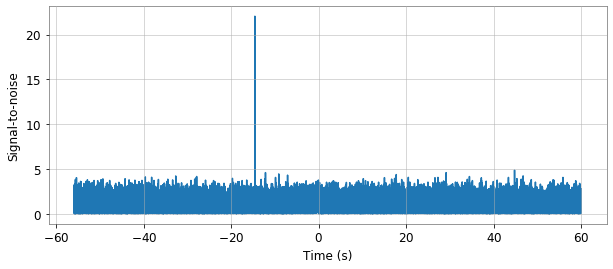

In [11]:
#matching the waveform with the data and psd
#resizing waveform to match data and shifting so it's the right way round
hp1.resize(len(pycbc_strain))
template = hp1.cyclic_time_shift(hp1.start_time)


snr = matched_filter(template, pycbc_strain ,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

#editing plot
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

**Challenge 3**

In [12]:
#necessary imports including data
from pycbc.filter import resample_to_delta_t, highpass


!wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf

--2022-02-14 22:09:31--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf’

challenge3.gwf      100%[===================>] 244.92M   145MB/s    in 1.7s    

2022-02-14 22:09:32 (145 MB/s) - ‘challenge3.gwf’ saved [256815066/256815066]



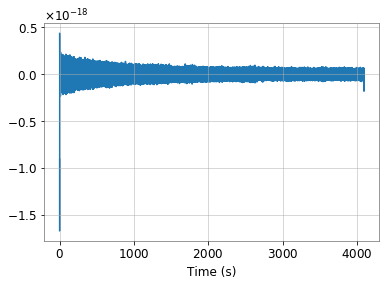

In [13]:
#reading frame, filtering and plotting
strain = pycbc.frame.read_frame('challenge3.gwf','H1:CHALLENGE3')

strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

#editing plot
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

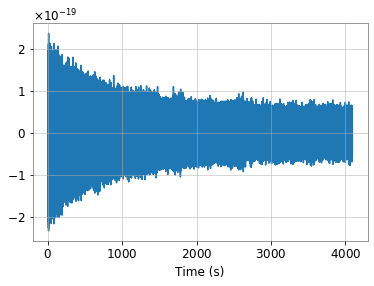

In [14]:
# Remove 2 seconds of data from both the beginning and end to eliminate spikes at ends
conditioned = strain.crop(2, 2)

#editing plot
pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [15]:
#creating psd from 4 samples
psd = conditioned.psd(4)
#interpolating to match data
psd = interpolate(psd, conditioned.delta_f)

psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

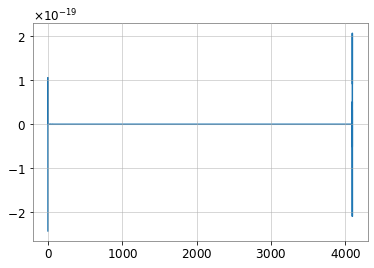

In [16]:
#creating template waveform
m = 10 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the template to match our conditioned data, we plot it afterwards so it looks a bit weird
hp.resize(len(conditioned))
#shifting template so it starts and ends right
template = hp.cyclic_time_shift(hp.start_time)

pylab.plot(template.sample_times, template)

We found a signal at 2483.96728515625s with SNR 28.8788305284542


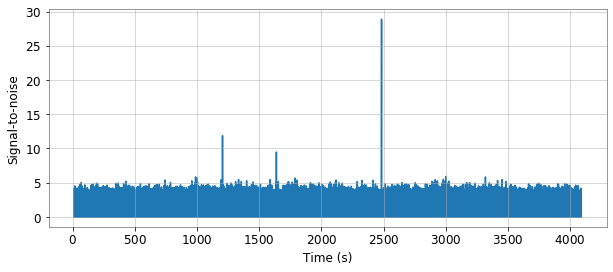

In [17]:

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

#cropping to account for corruption from previous methods
snr = snr.crop(4 + 4, 4)

#editing and plotting
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

**Challenge 4**

In [18]:
#mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#reading the data
ch4_dat = pycbc.types.load_timeseries('/content/drive/MyDrive/GW_noisedata-2.npy')
print(ch4_dat)

[-2.32205754e-17 -2.32043475e-17 -2.32064926e-17 ...
 -2.05771853e-17 -2.05823332e-17 -2.06011206e-17]


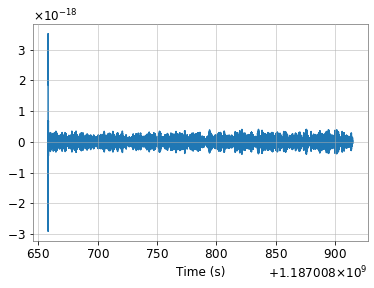

In [20]:
# Remove the low frequency content and downsample the data to 2048Hz
strain = highpass(ch4_dat, 10.0)
strain = resample_to_delta_t(strain, 1.0/2048)

#editing the plot
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

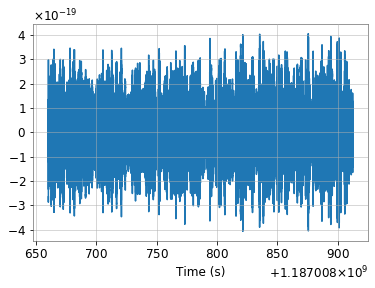

In [21]:
#cropping the corrupted ends
conditioned = strain.crop(2, 2)

#plotting the conditioned data
pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [22]:
#creating psd with 4 samples and interpolating to match data
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

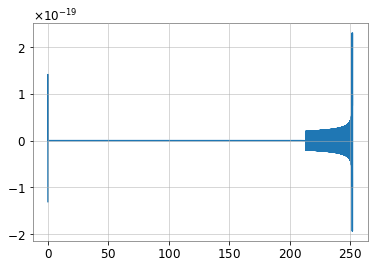

In [23]:
#creating template waveform
#10 solar masses gives best SNR, determined after trial and error
m = 10
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=10)
#resizing to match our conditioned data
hp.resize(len(conditioned))
#shifting
template = hp.cyclic_time_shift(hp.start_time)
#plotting
pylab.plot(template.sample_times, template)

We found a signal at 1187008698.9595704s with SNR 22.203843348795854


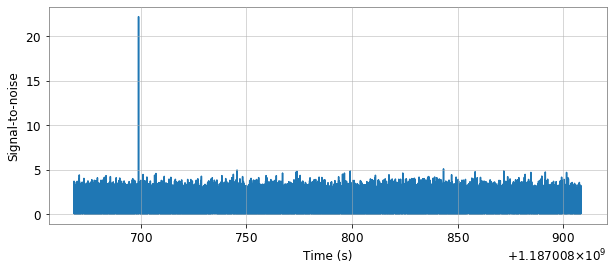

In [24]:
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
#cropping to account for corruption
snr = snr.crop(4 + 4, 4)

#editing and plotting
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
#SNR >8, GW detected
print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))